In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
print("Cancer.keys():\n{}".format(cancer.keys()))


Cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print("Shape of cancer data: {}".format(cancer.data.shape))
import numpy as np

Shape of cancer data: (569, 30)


In [10]:
print("Sample counts per class:")
for name, count in zip(cancer.target_names, np.bincount(cancer.target)):
    print(f"{name}: {count}")

Sample counts per class:
malignant: 212
benign: 357


In [11]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


(426, 30)
(143, 30)
[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


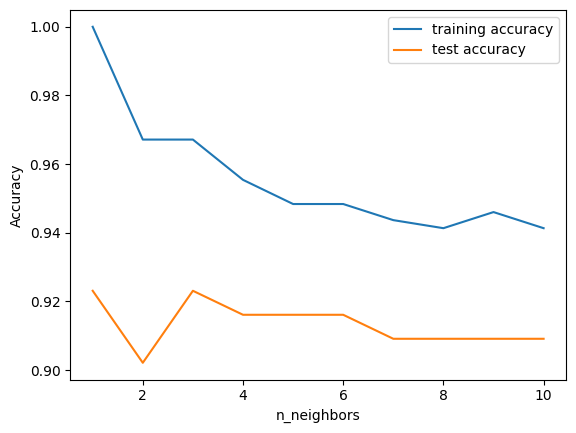

In [17]:
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)
print(X_train.shape)
print(X_test.shape)
training_accuracy = []
test_accuracy = []
for neighbour in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
print(training_accuracy)
print(test_accuracy)
plt.plot(range(1, 11), training_accuracy, label="training accuracy")
plt.plot(range(1, 11), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
data = load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576
258,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,...,19.85,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
df2=pd.DataFrame(data.target,columns=['target'])
df2.sample(5)

,target
119,0
511,1
72,0
321,0
247,1


([<matplotlib.patches.Wedge at 0x7cb4a26a8fe0>,
 [Text(-0.4286547583668386, 1.0130424957174637, '1'),
  Text(0.4286549676938969, -1.0130424071436221, '0')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

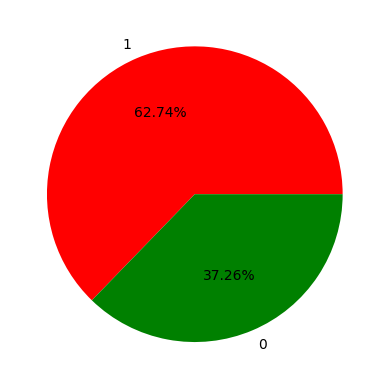

In [24]:
class_counts=df2["target"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=['red', 'green'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [26]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = model.predict(X_test)
print(y_pred[:15])

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.15%
